# Calculate Fermi SSR occupancy from TDRS and SAA schedules

### <span style="color:red; font-family:Georgia;">Robert Cameron, September 2015</span>

In [5]:
import numpy as np
import datetime as dt
from astropy.table import Table, Column
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = [20, 6])
plt.rc('font', size = 16)

In [18]:
# read regular ASCII tabular file of Fermi TDRS and SAA schedules
goodfile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/SSR/fill/foo4"
t = Table.read(goodfile, format='ascii',names=('doy','change','mode','durd','durs'))
doy = t['doy']
mode = t['mode']
durd = t['durd']
fill = t['durs']*1.0
# mode = 3: SAA = no,  PB = no  : SSR datarate (Mbps) = 1.75       : fracSSR/day =   1.5
# mode = 2: SAA = yes, PB = no  : SSR datarate (Mbps) = 0.0        : fracSSR/day =   0.0
# mode = 1: SAA = no,  PB = yes : SSR datarate (Mbps) = -35 + 1.75 : fracSSR/day = -19.0
# mode = 0: SAA = yes, PB = yes : SSR datarate (Mbps) = -35        : fracSSR/day = -20.0
fillrate = (-22, -21, 0, 1.5)

In [19]:
fill[0] = 0.37
for i in range(len(doy)-1):
    fill[i+1] = fill[i] + durd[i]*fillrate[mode[i]]

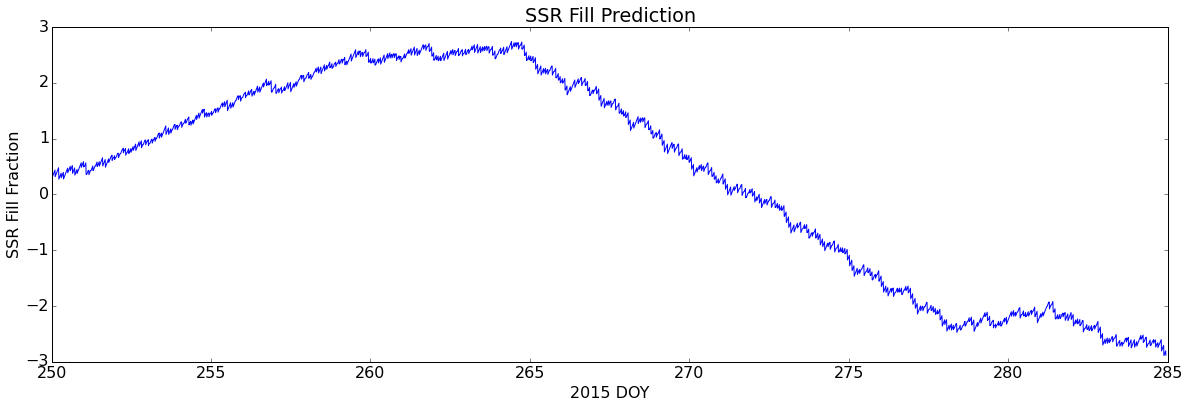

In [20]:
plt.plot(doy,fill)
plt.xlabel('2015 DOY')
plt.ylabel('SSR Fill Fraction')
plt.title('SSR Fill Prediction')